In [19]:
import os, progressbar, re, subprocess

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as multicomp

from Bio import SeqIO
from Bio.Seq import Seq, MutableSeq

In [20]:
def is_significant(mut_tol):
    if mut_tol > 2 :
        return 'HIGH'
    if mut_tol < -2:
        return 'LOW'
    else :
        return 'non significant'


def cluster(x):
    if x in HG_high_agg['proteinID_x'].values:
        return 'HIGH'
    else :
        return 'LOW'

In [21]:
#### Table with all per-protein aggregation propensity scores
prot_agg_table = pd.read_csv('../../data/aggregation_propensity/HGMM_agg_scores.csv', sep=',')
prot_agg_table['delta_aggregation'] = prot_agg_table['Aggregation_x'] - prot_agg_table['Aggregation_y']
prot_agg_table['delta_agg_z-scores'] = stats.zscore(prot_agg_table['delta_aggregation'])
prot_agg_table['difference_of_aggregation'] = prot_agg_table['delta_agg_z-scores'].apply(is_significant)

prot_muttol_table = pd.read_csv('../../data/mutation_tolerance/all_mt_scores_for_revisions.csv', sep='\t')
prot_muttol_table['diff_mut_v1'] = prot_muttol_table['mutTol_v1_x'] - prot_muttol_table['mutTol_v1_y']
prot_muttol_table['diff_mut_v1_z-scores'] = stats.zscore(prot_muttol_table['diff_mut_v1'])
prot_muttol_table['MT_DIFF_v1'] = prot_muttol_table['diff_mut_v1_z-scores'].apply(is_significant)

prot_muttol_table['diff_mut_v2'] = prot_muttol_table['mutTol_v2_x'] - prot_muttol_table['mutTol_v2_y']
prot_muttol_table['diff_mut_v2_z-scores'] = stats.zscore(prot_muttol_table['diff_mut_v2'])
prot_muttol_table['MT_DIFF_v2'] = prot_muttol_table['diff_mut_v2_z-scores'].apply(is_significant)

prot_muttol_table['diff_mut_v3'] = prot_muttol_table['mutTol_v3_x'] - prot_muttol_table['mutTol_v3_y']
prot_muttol_table['diff_mut_v3_z-scores'] = stats.zscore(prot_muttol_table['diff_mut_v3'])
prot_muttol_table['MT_DIFF_v3'] = prot_muttol_table['diff_mut_v3_z-scores'].apply(is_significant)

HG_high_agg = prot_agg_table[prot_agg_table['delta_agg_z-scores'] > 2]
HG_low_agg = prot_agg_table[prot_agg_table['delta_agg_z-scores'] < -2]

sign_agg_table = prot_muttol_table[(prot_muttol_table['proteinID_x'].isin(HG_high_agg['proteinID_x'])) | (prot_muttol_table['proteinID_x'].isin(HG_low_agg['proteinID_x'])) ].reset_index(drop=True)
sign_agg_table['AGG_DIFF'] = sign_agg_table['proteinID_x'].apply(cluster)

Stats for Figure 4A
Correlation between mutation tolerance
correlation score:0.8243961811161591, pvalue:0.0 



<Figure size 432x288 with 0 Axes>

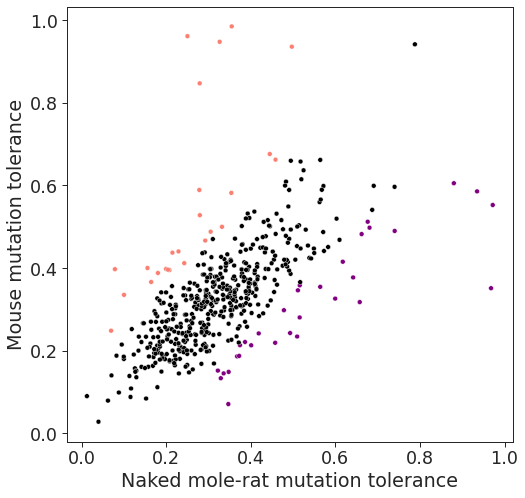

In [22]:
sns.set_context("paper", font_scale=2)
sns.set_style("ticks") 
sns.despine(offset=20)

fig = plt.figure(figsize= (8, 8))
sns.scatterplot(x=sign_agg_table['mutTol_v1_x'], y=sign_agg_table['mutTol_v1_y'], hue=sign_agg_table['MT_DIFF_v1'], hue_order=['non significant', 'HIGH', 'LOW'], palette=['black', 'purple', 'salmon'],legend=False)
plt.ylabel('Mouse mutation tolerance')
plt.xlabel('Naked mole-rat mutation tolerance')

# fig.savefig('../figures/FIGURE4_A.png', format='png', dpi=300)
# fig.savefig('../figures/FIGURE4_A.svg', format='svg', dpi=300)
# fig.savefig('../figures/FIGURE4_A.pdf', format='pdf', dpi=300)

print('Stats for Figure 4A')
corr, pval = stats.pearsonr(x=prot_muttol_table['mutTol_v1_x'], y=prot_muttol_table['mutTol_v1_y'])
print('Correlation between mutation tolerance')
print(f'correlation score:{corr}, pvalue:{pval} \n')

Stats for Figure 4A
Correlation between mutation tolerance
correlation score:0.7367014922479771, pvalue:0.0 



<Figure size 432x288 with 0 Axes>

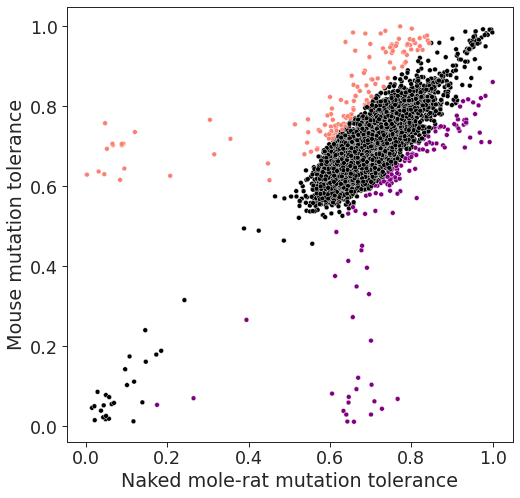

In [23]:
sns.set_context("paper", font_scale=2)
sns.set_style("ticks") 
sns.despine(offset=20)

fig = plt.figure(figsize= (8, 8))
sns.scatterplot(x=prot_muttol_table['mutTol_v2_x'], y=prot_muttol_table['mutTol_v2_y'], hue=prot_muttol_table['MT_DIFF_v2'], hue_order=['non significant', 'HIGH', 'LOW'], palette=['black', 'purple', 'salmon'],legend=False)
plt.ylabel('Mouse mutation tolerance')
plt.xlabel('Naked mole-rat mutation tolerance')

# fig.savefig('../figures/FIGURE4_A.png', format='png', dpi=300)
# fig.savefig('../figures/FIGURE4_A.svg', format='svg', dpi=300)
# fig.savefig('../figures/FIGURE4_A.pdf', format='pdf', dpi=300)

print('Stats for Figure 4A')
corr, pval = stats.pearsonr(x=prot_muttol_table['mutTol_v2_x'], y=prot_muttol_table['mutTol_v2_y'])
print('Correlation between mutation tolerance')
print(f'correlation score:{corr}, pvalue:{pval} \n')

In [78]:
prot_muttol_table['mutTol_v3_x'] = 1 - prot_muttol_table['mutTol_v3_x']
prot_muttol_table['mutTol_v3_y'] = 1 - prot_muttol_table['mutTol_v3_y']

Stats for Figure 4A
Correlation between mutation tolerance
correlation score:0.6655377916412064, pvalue:0.0 



<Figure size 432x288 with 0 Axes>

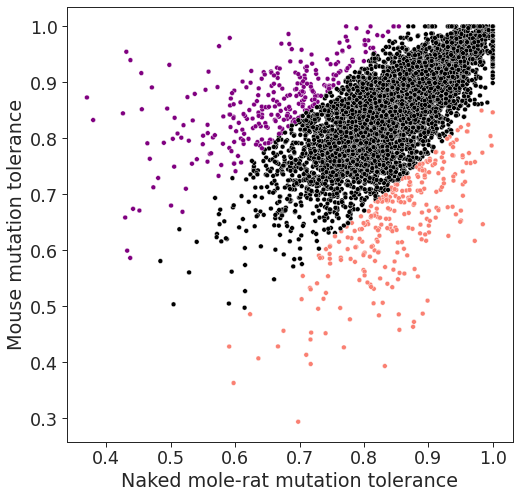

In [79]:
sns.set_context("paper", font_scale=2)
sns.set_style("ticks") 
sns.despine(offset=20)

fig = plt.figure(figsize= (8, 8))
sns.scatterplot(x=prot_muttol_table['mutTol_v3_x'], y=prot_muttol_table['mutTol_v3_y'], hue=prot_muttol_table['MT_DIFF_v3'], hue_order=['non significant', 'HIGH', 'LOW'], palette=['black', 'purple', 'salmon'],legend=False)
plt.ylabel('Mouse mutation tolerance')
plt.xlabel('Naked mole-rat mutation tolerance')

# fig.savefig('../figures/FIGURE4_A.png', format='png', dpi=300)
# fig.savefig('../figures/FIGURE4_A.svg', format='svg', dpi=300)
# fig.savefig('../figures/FIGURE4_A.pdf', format='pdf', dpi=300)

print('Stats for Figure 4A')
corr, pval = stats.pearsonr(x=prot_muttol_table['mutTol_v3_x'], y=prot_muttol_table['mutTol_v3_y'])
print('Correlation between mutation tolerance')
print(f'correlation score:{corr}, pvalue:{pval} \n')

___________

#### Prediction of mutation effects 

In [25]:
prot_agg_table[prot_agg_table['proteinID_y'] == 'Q9CVD2']

,proteinID_x,Aggregation_x,clusterNumber,length_x,proteinID_y,Aggregation_y,length_y,diff_length,gene_name,Pasta_Aggregation_x,Pasta_Aggregation_y,delta_aggregation,delta_agg_z-scores,difference_of_aggregation
3727,G5AZL7,3.769504,11619,373,Q9CVD2,6.469358,355,18,Atxn3,0.268097,0.28169,-2.699854,-2.160621,LOW


In [26]:
prot_agg_table[prot_agg_table['proteinID_y'] == 'P28658']

,proteinID_x,Aggregation_x,clusterNumber,length_x,proteinID_y,Aggregation_y,length_y,diff_length,gene_name,Pasta_Aggregation_x,Pasta_Aggregation_y,delta_aggregation,delta_agg_z-scores,difference_of_aggregation
9462,G5BVC0,6.631717,5978,587,P28658,10.1254,475,112,Atxn10,0.170358,0.210526,-3.493683,-2.774137,LOW


In [27]:
HG_cds_fasta = '../../data/ortholog_dataset/uni_HG_cds_orthologs.faa'
MM_cds_fasta = '../../data/ortholog_dataset/uni_MM_cds_orthologs.faa'

In [28]:
def get_Seq(seqID, org):
    if 'mus_musculus' in org :
        for seqRecord in SeqIO.parse(MM_cds_fasta, format='fasta'):
            if seqRecord.id == seqID :
                return seqRecord
    elif 'heterocephalus_glaber' in org : 
        for seqRecord in SeqIO.parse(HG_cds_fasta, format='fasta'):
            if seqRecord.id == seqID :
                return seqRecord



def get_Mut(seqID, seqRecord, output_name):
    aa_changes = []
    variations = []
    # MUT_RES = '/media/savvy/Seagate/PhD_Project/project_2018/computational_mutagenesis/FINAL_RESULTS'
    MUT_RES = '/media/savvy/DATA3/savvy/project_2018/computational_mutagenesis/FINAL_RESULTS'

    MM_tmp = pd.read_csv(os.path.join(MUT_RES,f'{seqID}_aggregation.txt'), sep='\t')
    MM_tmp['deltaAgg'] = MM_tmp['Aggregation'] - MM_tmp['Aggregation'][0]

    ALL_MUT = [ ( MM_tmp['Sequence'][i], MM_tmp['deltaAgg'][i], MM_tmp['Sequence'][i].split('_')[1], MM_tmp['Sequence'][i].split('_')[2][0], MM_tmp['Sequence'][i].split('_')[2][1] )  for i in MM_tmp.index[1:] ]

    nc_mutTable = pd.DataFrame(ALL_MUT, columns=['Sequence_ID', 'deltaAgg', 'i', 'REF', 'ALT'])
    nc_mutTable['nucl_changes'] = [ f'{nc_mutTable["i"][i]}{nc_mutTable["REF"][i]}{nc_mutTable["ALT"][i]}' for i in nc_mutTable.index ]
    for idx in nc_mutTable.index :
        i = int(nc_mutTable['i'][idx])
        REF = nc_mutTable['REF'][idx]
        ALT = nc_mutTable['ALT'][idx]

        REF_SEQ = str(seqRecord.seq.translate()).replace('*','')
        mutant = MutableSeq(str(seqRecord.seq))
        mutant[i] = ALT
        ALT_SEQ = str(Seq(str(mutant)).translate()).replace('*', '')

        for j in range(len(REF_SEQ) - 1) :
            if REF_SEQ[j] != ALT_SEQ[j]:
                # provean_inputs.append(f'{ensemblID} {i+1} {REF_SEQ[i]} {ALT_SEQ[i]}')
                aa_changes.append([f'{i}{REF}{ALT}', f'{REF_SEQ[j]}{j+1}{ALT_SEQ[j]}'])
    
    aa_mutTable = pd.DataFrame(aa_changes, columns=['nucl_changes', 'aa_changes'])
    aa_mutTable = aa_mutTable.merge(nc_mutTable, on=['nucl_changes'])
    
    f = open(output_name, 'w')
    for var in aa_mutTable['aa_changes']:
        f.write(f'{var}\n')
    f.close()

    return aa_mutTable
        

In [29]:
#### Atx-10 (PROVEAN inputs)
ATX10_MM = get_Seq('P28658', 'mus_musculus')
MM_ATX10_AGG = get_Mut('P28658', ATX10_MM, '../../data/PROVEAN/inputs/MM_ATX-10.txt')

ATX10_HG = get_Seq('G5BVC0', 'heterocephalus_glaber')
HG_ATX10_AGG = get_Mut('G5BVC0', ATX10_HG, '../../data/PROVEAN/inputs/HG_ATX-10.txt')

#### Atx-10 (PROVEAN outputs)
MM_ATX10_provean = pd.read_csv('../../data/PROVEAN/outputs/MM_ATX-10_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])
HG_ATX10_provean = pd.read_csv('../../data/PROVEAN/outputs/HG_ATX-10_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])

In [30]:
MM_ATX10_AGG['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(MM_ATX10_AGG['aa_changes'][i]))[0] for i in MM_ATX10_AGG.index ]
MM_ATX10_AGG['RES'] = MM_ATX10_AGG['RES'].astype(int)

MM_ATX10_provean['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(MM_ATX10_provean['aa_changes'][i]))[0] for i in MM_ATX10_provean.index ]
MM_ATX10_provean['RES'] = MM_ATX10_provean['RES'].astype(int)

SpearmanrResult(correlation=0.15324834957704542, pvalue=0.0008156255354065373)

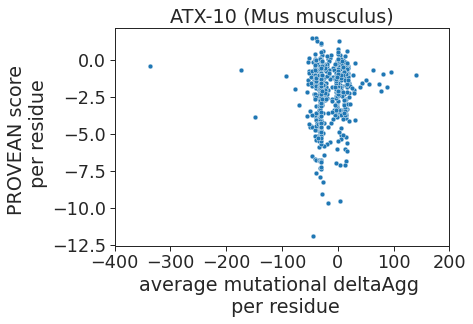

In [77]:
avg_res_MM_ATX10 = MM_ATX10_AGG.groupby('RES').mean().reset_index().merge(MM_ATX10_provean.groupby('RES').mean().reset_index(), on='RES')
sns.scatterplot(data=avg_res_MM_ATX10, x='deltaAgg', y='PROVEAN')
plt.xlim(-400,200)
plt.ylabel('PROVEAN score \n per residue')
plt.xlabel('average mutational deltaAgg \n per residue')
plt.title('ATX-10 (Mus musculus)')
stats.spearmanr(avg_res_MM_ATX10['deltaAgg'], avg_res_MM_ATX10['PROVEAN'])

Text(0.5, 1.0, 'ATX-10 (Mus musculus)')

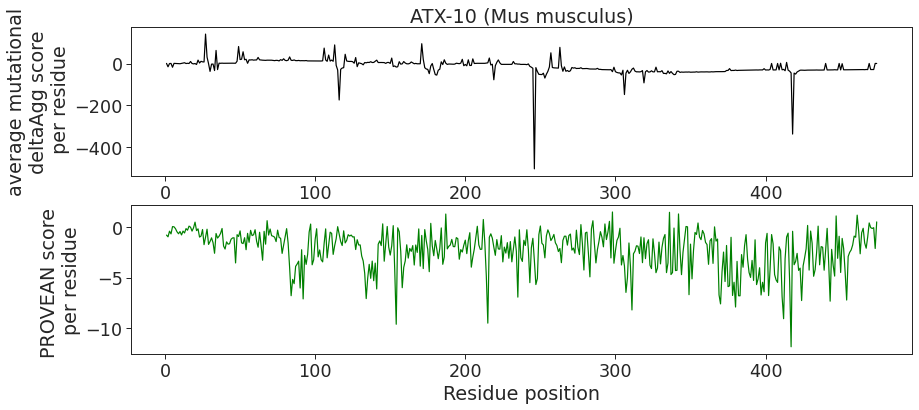

In [62]:
f, axes = plt.subplots(ncols=1, nrows=2, sharex=False, sharey=False, figsize=(14, 6))
sns.lineplot(data=avg_res_MM_ATX10, x='RES', y='deltaAgg', color='black', ax=axes[0])
sns.lineplot(data=avg_res_MM_ATX10, x='RES', y='PROVEAN', color='green', ax=axes[1])
plt.xlabel('Residue position')
axes[0].set_ylabel('average mutational\n deltaAgg score \n per residue')
axes[1].set_ylabel('PROVEAN score \nper residue')
axes[0].set_title('ATX-10 (Mus musculus)')

In [38]:
HG_ATX10_AGG['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(HG_ATX10_AGG['aa_changes'][i]))[0] for i in HG_ATX10_AGG.index ]
HG_ATX10_AGG['RES'] = HG_ATX10_AGG['RES'].astype(int)

HG_ATX10_provean['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(HG_ATX10_provean['aa_changes'][i]))[0] for i in HG_ATX10_provean.index ]
HG_ATX10_provean['RES'] = HG_ATX10_provean['RES'].astype(int)

SpearmanrResult(correlation=0.3170155433802523, pvalue=3.798144734942701e-15)

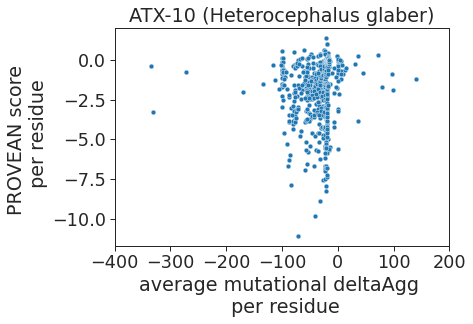

In [76]:
avg_res_HG_ATX10 = HG_ATX10_AGG.groupby('RES').mean().reset_index().merge(HG_ATX10_provean.groupby('RES').mean().reset_index(), on='RES')
sns.scatterplot(data=avg_res_HG_ATX10, x='deltaAgg', y='PROVEAN')
plt.xlim(-400,200)
plt.ylabel('PROVEAN score \n per residue')
plt.xlabel('average mutational deltaAgg \n per residue')
plt.title('ATX-10 (Heterocephalus glaber)')
stats.spearmanr(avg_res_HG_ATX10['deltaAgg'], avg_res_HG_ATX10['PROVEAN'])


Text(0.5, 1.0, 'ATX-10 (Heterocephalus glaber)')

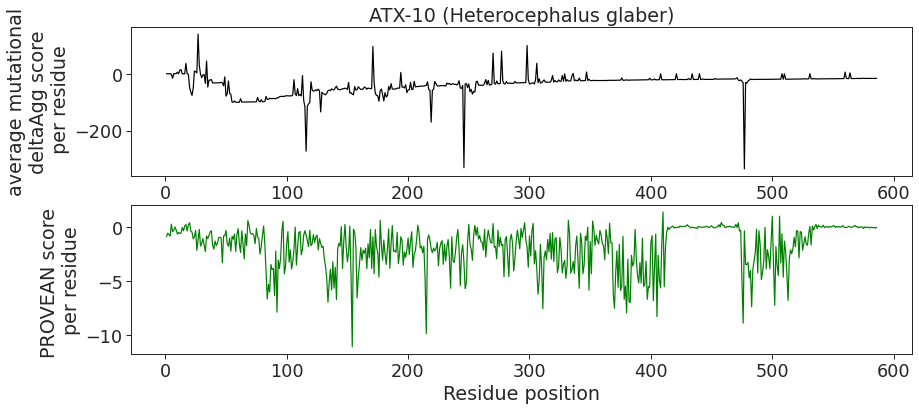

In [61]:
f, axes = plt.subplots(ncols=1, nrows=2, sharex=False, sharey=False, figsize=(14, 6))
sns.lineplot(data=avg_res_HG_ATX10, x='RES', y='deltaAgg', color='black', ax=axes[0])
sns.lineplot(data=avg_res_HG_ATX10, x='RES', y='PROVEAN', color='green', ax=axes[1])
plt.xlabel('Residue position')
axes[0].set_ylabel('average mutational\n deltaAgg score \n per residue')
axes[1].set_ylabel('PROVEAN score \nper residue')
axes[0].set_title('ATX-10 (Heterocephalus glaber)')

In [41]:
#### Atx-3 (provean inputs)
ATX3_MM = get_Seq('Q9CVD2', 'mus_musculus')
ATX3_HG = get_Seq('G5AZL7', 'heterocephalus_glaber')
plt.xlabel('Residue position')
MM_ATX3_AGG = get_Mut('Q9CVD2', ATX3_MM, '../../data/PROVEAN/inputs/MM_ATX-3.txt')
HG_ATX3_AGG = get_Mut('G5AZL7', ATX3_HG, '../../data/PROVEAN/inputs/HG_ATX-3.txt')

#### Atx-3 (PROVEAN outputs)
MM_ATX3_provean = pd.read_csv('../../data/PROVEAN/outputs/MM_ATX-3_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])
HG_ATX3_provean = pd.read_csv('../../data/PROVEAN/outputs/HG_ATX-3_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])

In [42]:
MM_ATX3_AGG['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(MM_ATX3_AGG['aa_changes'][i]))[0] for i in MM_ATX3_AGG.index ]
MM_ATX3_AGG['RES'] = MM_ATX3_AGG['RES'].astype(int)

MM_ATX3_provean['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(MM_ATX3_provean['aa_changes'][i]))[0] for i in MM_ATX3_provean.index ]
MM_ATX3_provean['RES'] = MM_ATX3_provean['RES'].astype(int)

SpearmanrResult(correlation=0.07538984938196631, pvalue=0.15693666287654048)

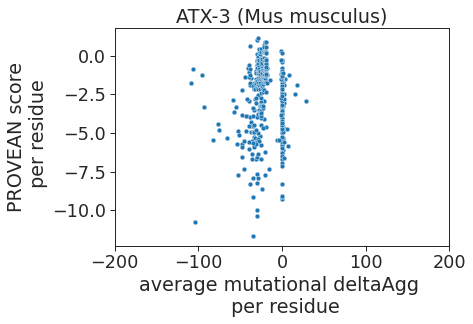

In [72]:
avg_res_MM_ATX3 = MM_ATX3_AGG.groupby('RES').mean().reset_index().merge(MM_ATX3_provean.groupby('RES').mean().reset_index(), on='RES')
sns.scatterplot(data=avg_res_MM_ATX3, x='deltaAgg', y='PROVEAN')
plt.xlim(-200,200)
plt.ylabel('PROVEAN score\n per residue')
plt.xlabel('average mutational deltaAgg \n per residue')
plt.title('ATX-3 (Mus musculus)')
stats.spearmanr(avg_res_MM_ATX3['deltaAgg'], avg_res_MM_ATX3['PROVEAN'])

Text(0.5, 1.0, 'ATX-3 (Mus musculus)')

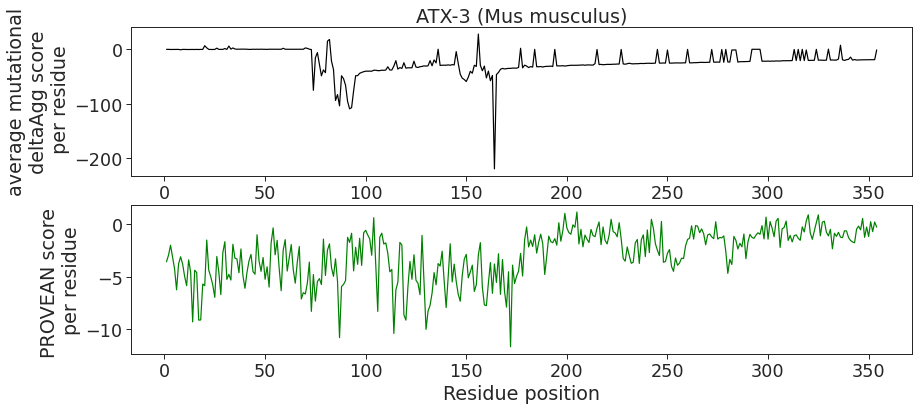

In [60]:
f, axes = plt.subplots(ncols=1, nrows=2, sharex=False, sharey=False, figsize=(14, 6))
sns.lineplot(data=avg_res_MM_ATX3, x='RES', y='deltaAgg', color='black', ax=axes[0])
sns.lineplot(data=avg_res_MM_ATX3, x='RES', y='PROVEAN', color='green', ax=axes[1])
plt.xlabel('Residue position')
axes[0].set_ylabel('average mutational\n deltaAgg score \n per residue')
axes[1].set_ylabel('PROVEAN score \nper residue')
axes[0].set_title('ATX-3 (Mus musculus)')

In [45]:
HG_ATX3_AGG['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(HG_ATX3_AGG['aa_changes'][i]))[0] for i in HG_ATX3_AGG.index ]
HG_ATX3_AGG['RES'] = HG_ATX3_AGG['RES'].astype(int)

HG_ATX3_provean['RES'] = [ re.findall(r'[A-Z]{1}([0-9]+)[A-Z]{1}', str(HG_ATX3_provean['aa_changes'][i]))[0] for i in HG_ATX3_provean.index ]
HG_ATX3_provean['RES'] = HG_ATX3_provean['RES'].astype(int)

SpearmanrResult(correlation=-0.4433260034132074, pvalue=2.4253104065672904e-19)

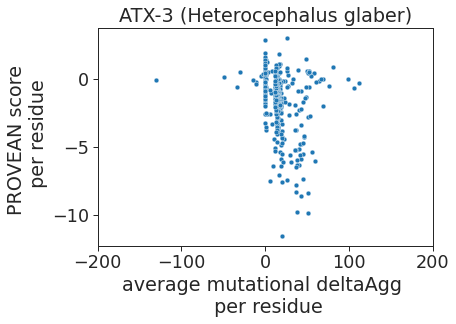

In [73]:
avg_res_HG_ATX3 = HG_ATX3_AGG.groupby('RES').mean().reset_index().merge(HG_ATX3_provean.groupby('RES').mean().reset_index(), on='RES')
sns.scatterplot(data=avg_res_HG_ATX3, x='deltaAgg', y='PROVEAN')
plt.xlim(-200,200)
plt.ylabel('PROVEAN score \n per residue')
plt.xlabel('average mutational deltaAgg \n per residue')
plt.title('ATX-3 (Heterocephalus glaber)')
stats.spearmanr(avg_res_HG_ATX3['deltaAgg'], avg_res_HG_ATX3['PROVEAN'])

Text(0.5, 1.0, 'ATX-3 (Heterocephalus glaber)')

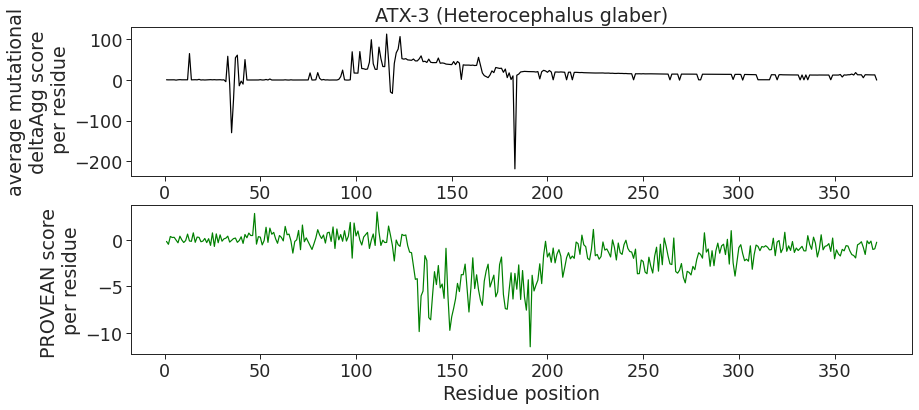

In [59]:
f, axes = plt.subplots(ncols=1, nrows=2, sharex=False, sharey=False, figsize=(14, 6))
sns.lineplot(data=avg_res_HG_ATX3, x='RES', y='deltaAgg', color='black', ax=axes[0])
sns.lineplot(data=avg_res_HG_ATX3, x='RES', y='PROVEAN', color='green', ax=axes[1])
plt.xlabel('Residue position')
axes[0].set_ylabel('average mutational\n deltaAgg score \n per residue')
axes[1].set_ylabel('PROVEAN score \nper residue')
axes[0].set_title('ATX-3 (Heterocephalus glaber)')